In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

**2018 - 2019 EDA**

In [2]:
file_paths = []
exclusions = ['xls','pdf','4','5','00','6','7','8','9','10','11','12','weight','1a']
for file_path in glob.glob('2018-2019/*', recursive = True):
    skip = False
    for exclusion in exclusions:
        if exclusion in os.path.basename(file_path):
            skip = True
    if skip:
        continue
    
    file_paths.append(file_path)

In [3]:
sections_data = {}
for file_path in file_paths:
    sections_data[os.path.basename(file_path).replace('.sav','')] = pd.read_spss(file_path)

In [4]:
for key in sections_data.keys():
    sections_data[key].columns = sections_data[key].columns.str.lower()

In [5]:
combined_data = sections_data['plist']
index = ['hhcode', 'psu','province','region','idc']
for key in sections_data.keys():
    if key in ['plist']:
        continue
    combined_data = pd.merge(combined_data, sections_data[key], on = index, how = 'left')
    print(combined_data.shape)

(159949, 45)
(159949, 76)
(159949, 106)
(159949, 125)
(159949, 155)
(159949, 168)


In [6]:
combined_data = combined_data.rename(columns = {'s1aq04':'gender','s1aq07':'marital status'})

In [7]:
metric_df = combined_data.loc[:, 's2cq01':'s2cq14_3'].drop(columns = ['s2cq04','s2cq07','s2cq14_1', 's2cq14_2', 's2cq14_3']).copy()

In [8]:
metric_df.columns

Index(['s2cq01', 's2cq02', 's2cq03_1', 's2cq03_2', 's2cq03_3', 's2cq03_4',
       's2cq03_5', 's2cq03_6', 's2cq05', 's2cq06', 's2cq08', 's2cq09_1',
       's2cq09_2', 's2cq09_3', 's2cq10', 's2cq11', 's2cq12_1', 's2cq12_2',
       's2cq12_3', 's2cq13_1', 's2cq13_2', 's2cq13_3', 's2cq13_4', 's2cq13_5',
       's2cq13_6'],
      dtype='object')

In [9]:
metric_df['s2cq01'] = metric_df['s2cq01'].replace({'Desktop':1, 'Laptop':1,'Other':1,'No':0,'Tablet':1}).astype(float).fillna(0)
metric_df['s2cq01'].unique()

array([0., 1.])

In [10]:
metric_df['s2cq02'] = metric_df['s2cq02'].replace({'  Home':1,'Work place':2,'Education place':3,'Others':4}).astype(float).fillna(0)

In [11]:
metric_df.loc[:,'s2cq03_1':'s2cq03_6'] = metric_df.loc[:,'s2cq03_1':'s2cq03_6'].replace({
     'Copying or moving a file or  folder':2,
     'Using copy and paste tools to duplicate or move information within a document':3,
     'Sending emails with attached files':4,
     'Using basic arithmetic formulas in a spread sheet':5,
     'Connecting and installing new devices e.g. a modem, camera, printer)':6,
     'Finding, downloading, installing and configuring software':7,
     'Creating electronic presentations with presentation software':8,
     'Transferring files between a computer and other devices':9,
     'Writing a computer program using a specialized programming language':10,
     'Social Media':1,
     'Entertainment':1,
     'All of the above':1+1+2+3+4+5+6+7+8+9+10
}).astype(float).fillna(0)

C:\Users\Ali Sheryar\AppData\Local\Temp\ipykernel_7512\2574369543.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  metric_df.loc[:,'s2cq03_1':'s2cq03_6'] = metric_df.loc[:,'s2cq03_1':'s2cq03_6'].replace({


In [12]:
metric_df['s2cq05'] = metric_df['s2cq05'].replace({'Mobile phone':1,'None of above':0,'Smart phone':1}).astype(float).fillna(0)

In [13]:
metric_df['s2cq06'] = metric_df['s2cq06'].replace({'Mobile phone':1,'None of above':0,'Smart phone':1}).astype(float).fillna(0)

In [14]:
metric_df['s2cq08'] = metric_df['s2cq08'].replace({' No':0, 'Yes':1}).astype(float).fillna(0)

In [15]:
metric_df.loc[:,'s2cq09_1':'s2cq09_3'] = metric_df.loc[:,'s2cq09_1':'s2cq09_3'].replace({
    'Home':1,
    'Work':2,
    'Place of education':3,
    'Another person home':1,
    'Commercial internet access facility':2,
    'Community internet access facility':2,
    'In mobility':1,
    'Other location':1,
    'All of the above':1+2+3+1+2+2+1+1
}).astype(float).fillna(0)

C:\Users\Ali Sheryar\AppData\Local\Temp\ipykernel_7512\3235119401.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  metric_df.loc[:,'s2cq09_1':'s2cq09_3'] = metric_df.loc[:,'s2cq09_1':'s2cq09_3'].replace({


In [16]:
metric_df['s2cq10'] = metric_df['s2cq10'].replace({
    'once a month':1,
    'once a week':2,
    'once a day':3,
    'As Required':4
}).astype(float).fillna(0)

In [17]:
metric_df['s2cq11'] = metric_df['s2cq11'].replace({' No':0, 'Yes':1}).astype(float).fillna(0)

In [18]:
metric_df.loc[:,'s2cq12_1':'s2cq12_3'] = metric_df.loc[:,'s2cq12_1':'s2cq12_3'].replace({
    'Home':1,
    'Work':2,
    'Place of education':3,
    'Another person home':1,
    'Commercial internet access facility':2,
    'Community internet access facility':2,
    'In mobility':1,
    'Other location':1,
    'All of the above':1+2+3+1+2+2+1
}).astype(float).fillna(0)

C:\Users\Ali Sheryar\AppData\Local\Temp\ipykernel_7512\415088446.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  metric_df.loc[:,'s2cq12_1':'s2cq12_3'] = metric_df.loc[:,'s2cq12_1':'s2cq12_3'].replace({


In [19]:
metric_df.loc[:,'s2cq13_1':'s2cq13_6'] = metric_df.loc[:,'s2cq13_1':'s2cq13_6'].replace({
    'Email, chatting, Facebook etc':1,
    'Voice and Video calls on -Skype, whats App etc':1,
    'Information seeking (news,health, Govt., etc.)':2,
    'Downloading /watching movies, dramas etc.':3,
    'Online shopping/banking':4,
    'Business Purpose':5,
    'Downloading software, programs':6,
    'Education and research':7,
    'All of the above':1+1+2+3+4+5+6+7
}).astype(float).fillna(0)

C:\Users\Ali Sheryar\AppData\Local\Temp\ipykernel_7512\3678859569.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  metric_df.loc[:,'s2cq13_1':'s2cq13_6'] = metric_df.loc[:,'s2cq13_1':'s2cq13_6'].replace({


In [20]:
metric_df['metric'] = metric_df.sum(axis = 1).astype(int)

In [21]:
combined_data['metric'] = metric_df['metric']/metric_df['metric'].max()

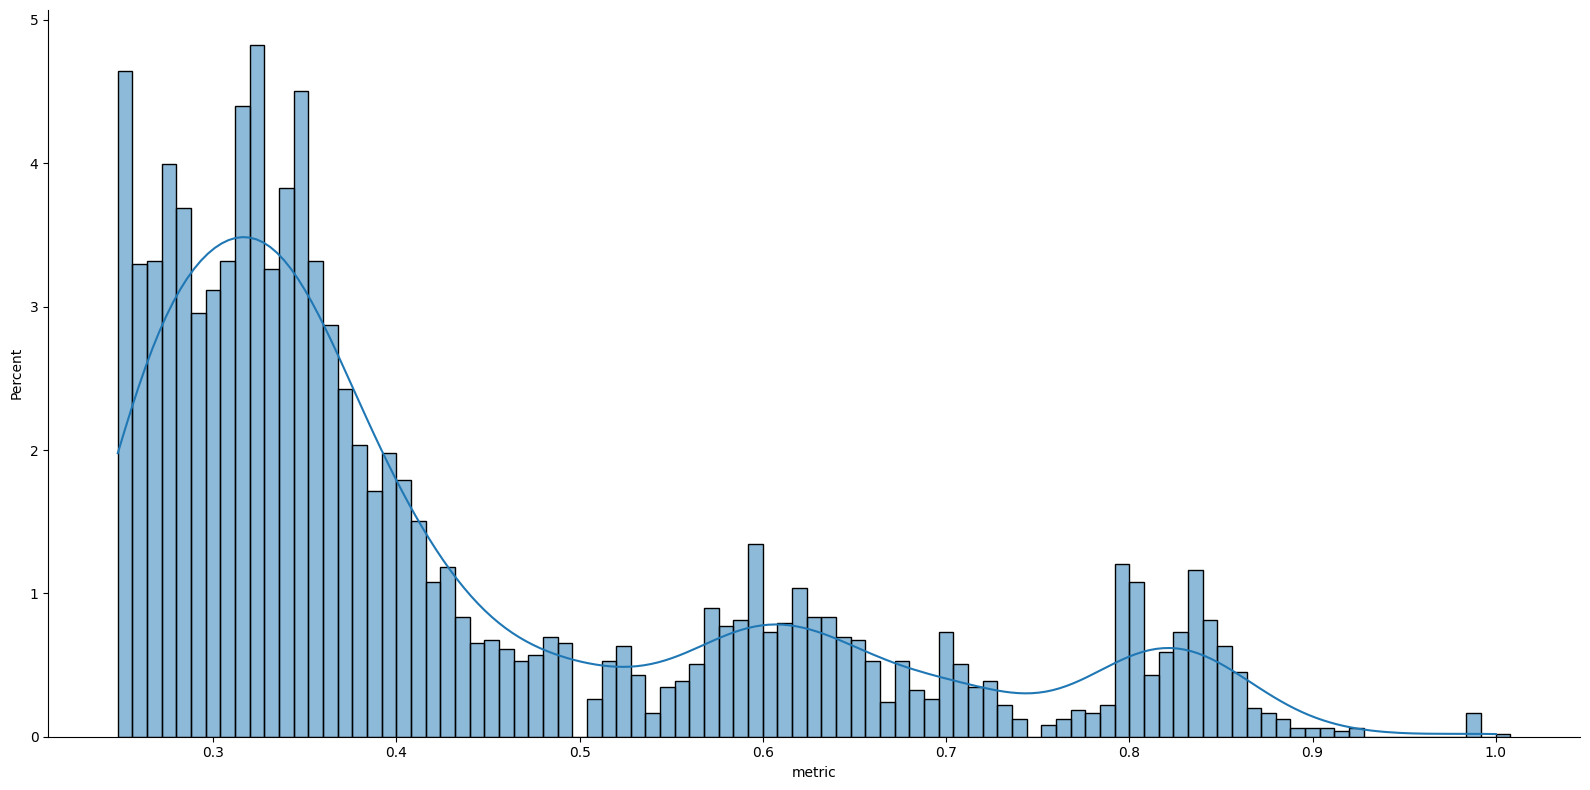

In [22]:
fig = sns.displot(data = combined_data.query("metric > 0.24")['metric'], binwidth = 0.008, height = 8, aspect = 2, stat = 'percent', kde = True)

In [23]:
len(combined_data.query("metric < 0.024 and province == 'Balochistan'"))/len(combined_data.query("province == 'Balochistan'"))

0.9483603066439523

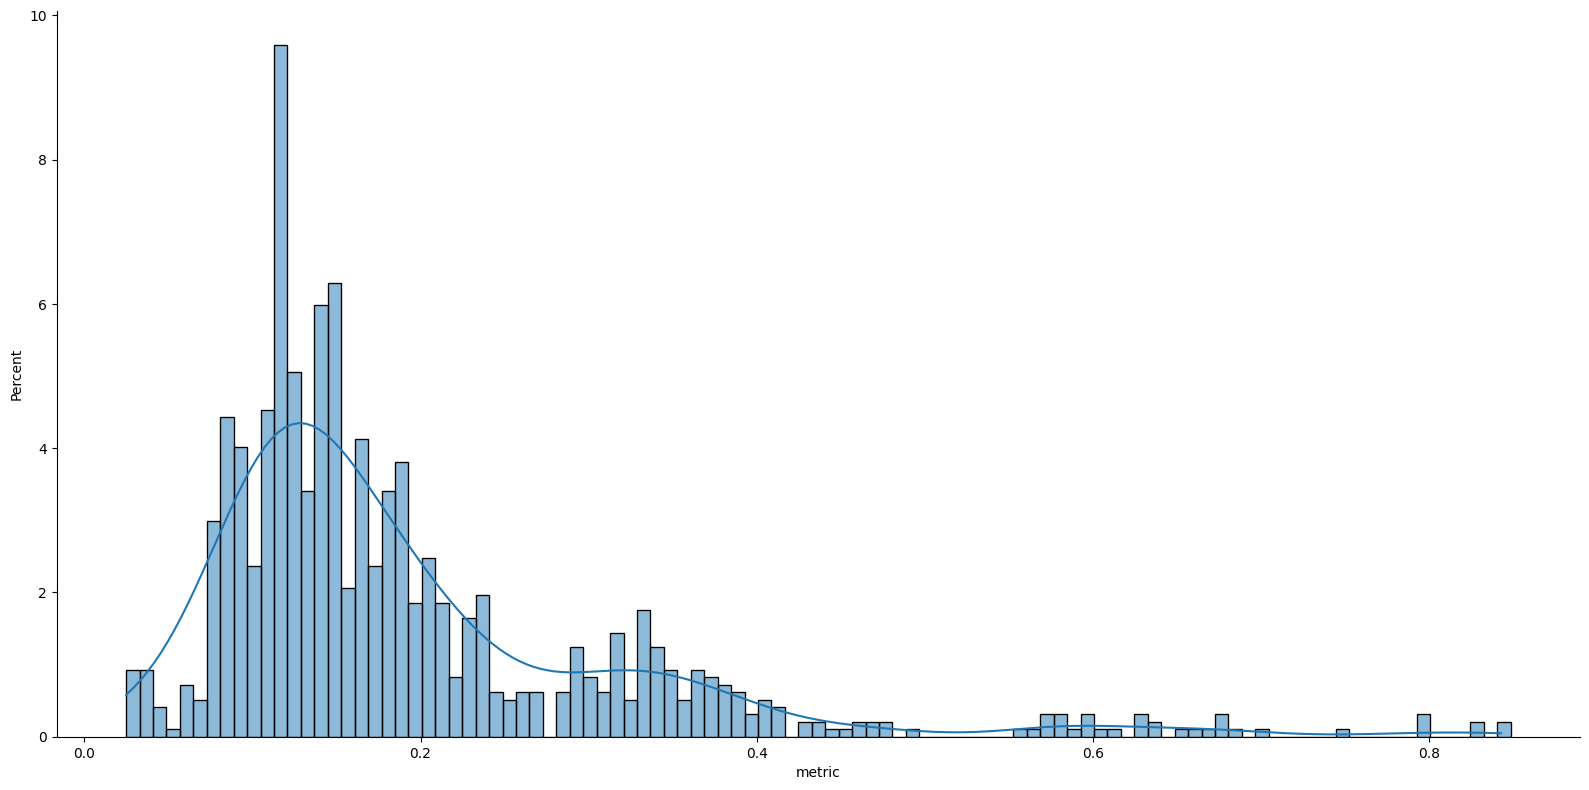

In [24]:
fig = sns.displot(data = combined_data.query("metric > 0.024 and province == 'Balochistan'")['metric'], binwidth = 0.008, height = 8, aspect = 2, stat = 'percent', kde = True)

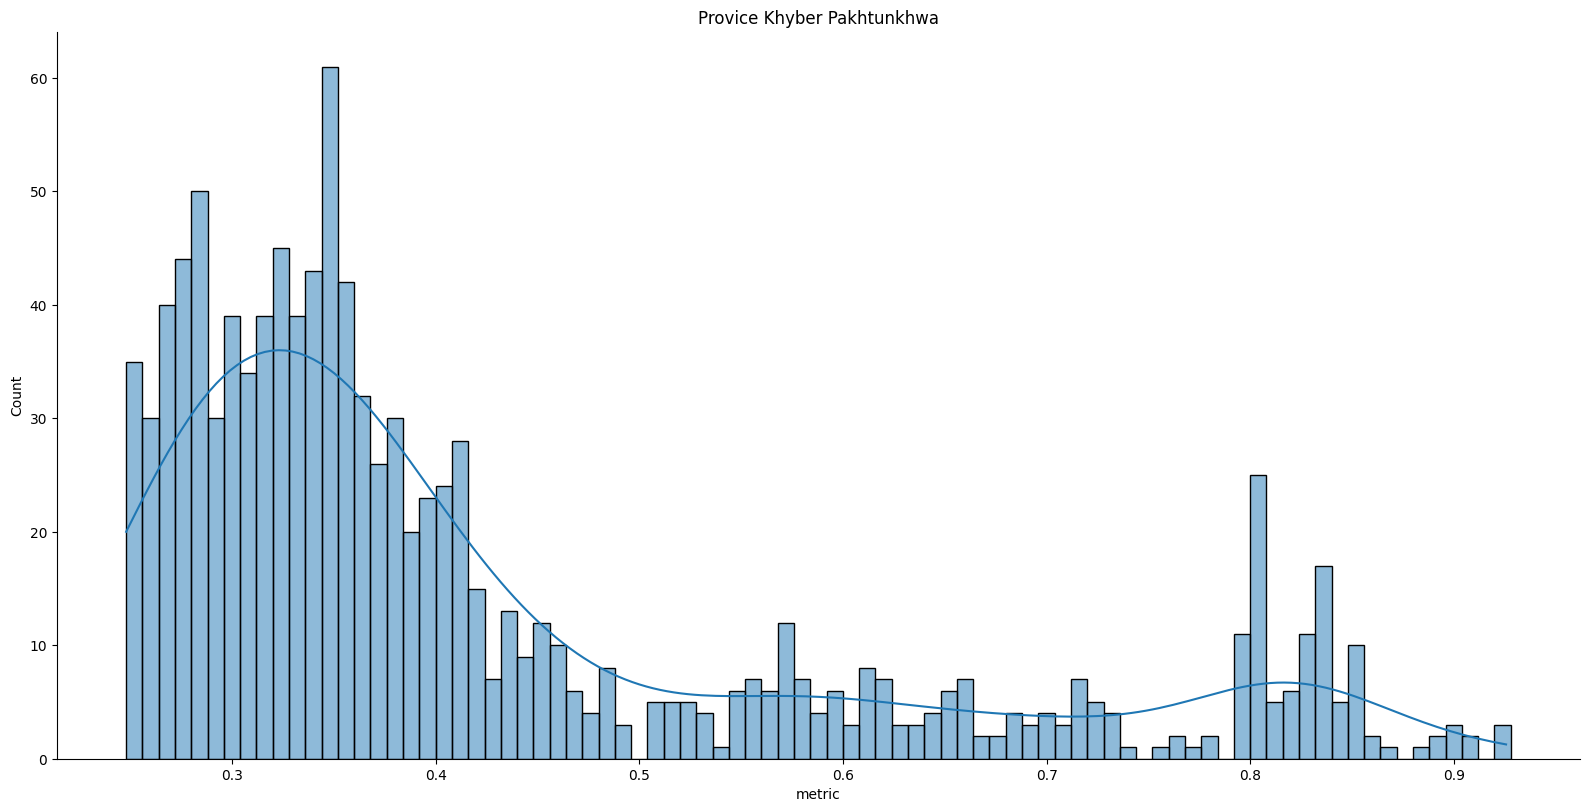

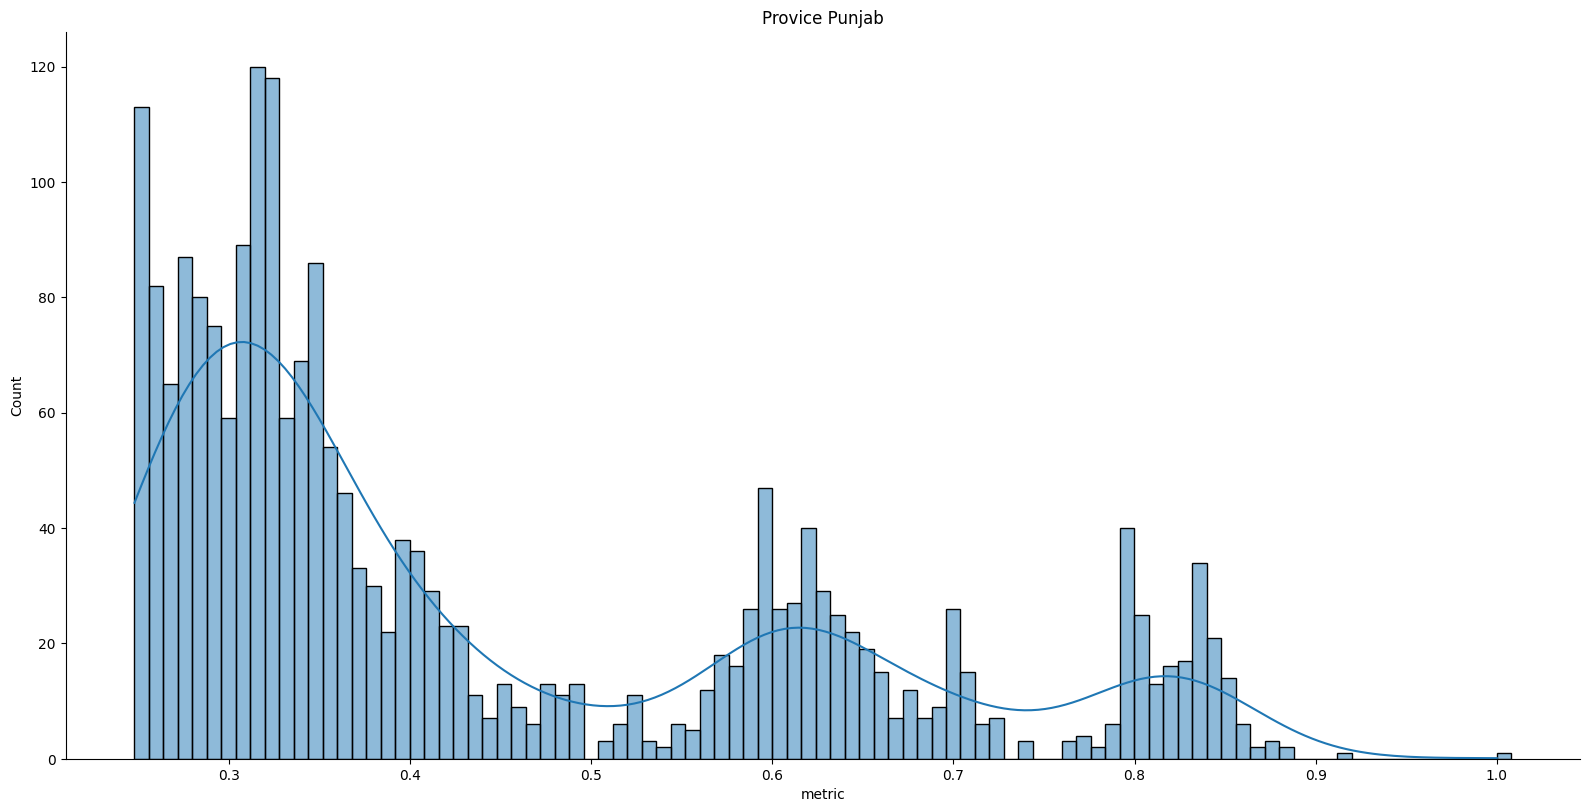

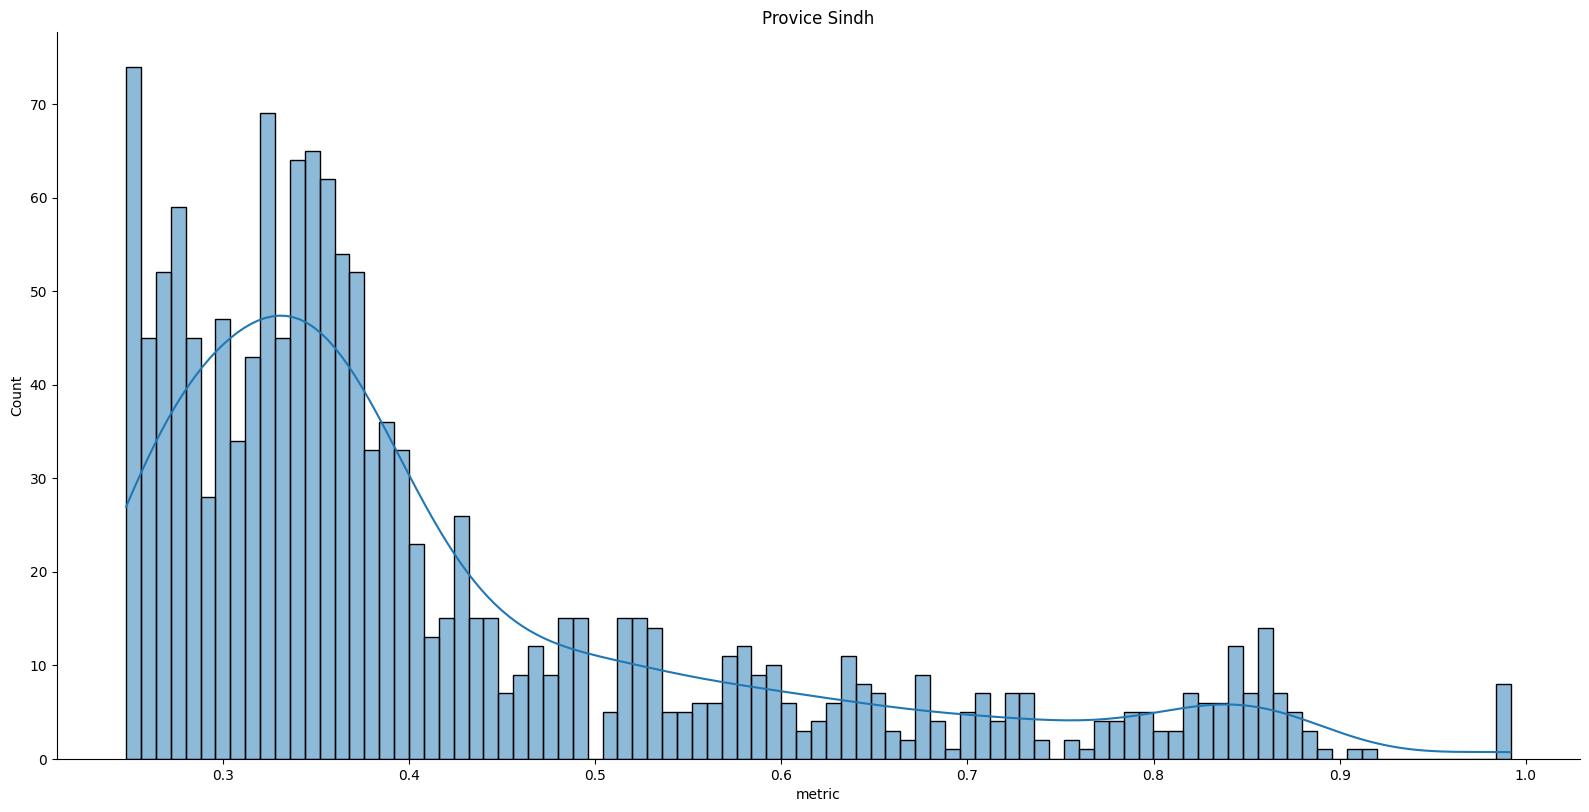

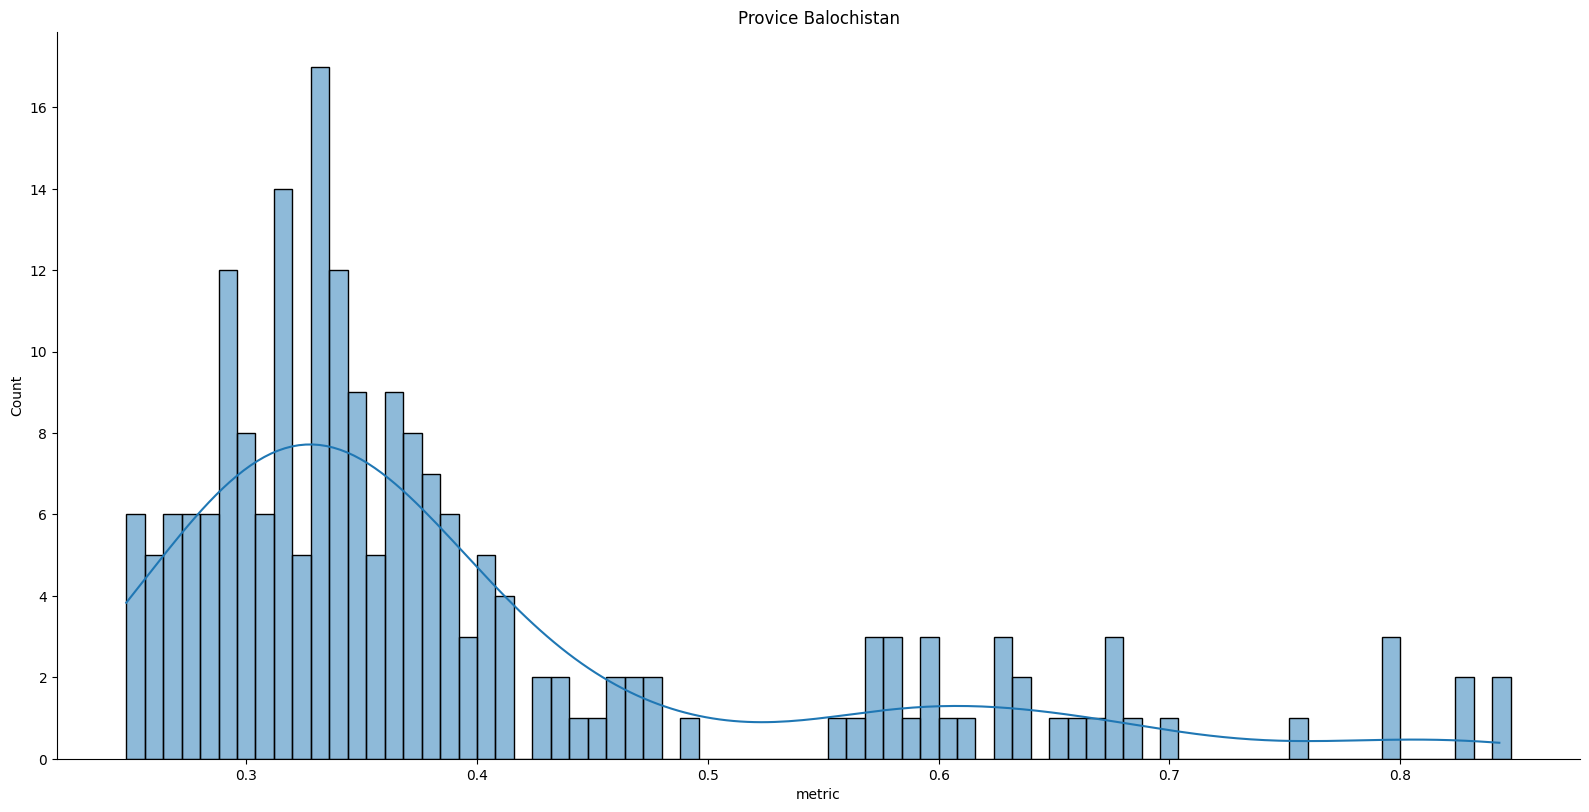

In [25]:
for i in combined_data['province'].unique():
    fig = sns.displot(data = combined_data.query("metric > 0.24").loc[combined_data['province'] == i, 'metric'], binwidth = 0.008, height = 8, aspect = 2, kde = True)
    plt.title('Provice ' + str(i))
    plt.show()

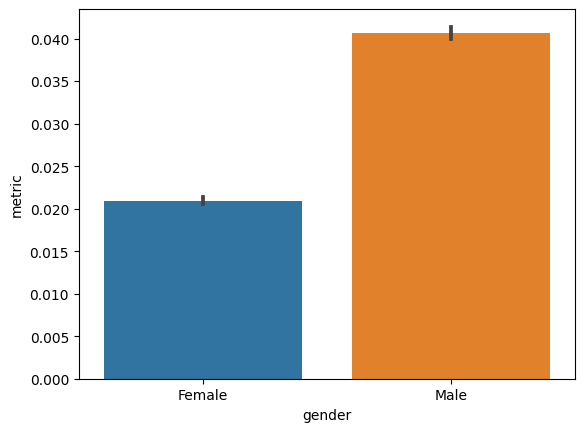

In [26]:
fig = sns.barplot(x = combined_data['gender'], y = combined_data['metric'])

In [27]:
L1 = combined_data.query("gender == 'Male'")['metric']
L2 = combined_data.query("gender == 'Female'")['metric']
a1 = []
a2 = []
for i in range(1000):
    a1.append(L1.sample(frac = 1, replace = True).mean())
    a2.append(L2.sample(frac = 1, replace = True).mean())
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

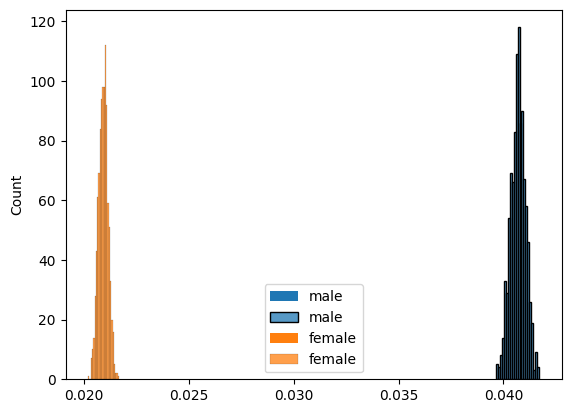

In [28]:
sns.histplot(a1, label = 'male')
sns.histplot(a2, label = 'female')
plt.legend()

In [29]:
sum(a2)/len(a2)

0.020914247713537115

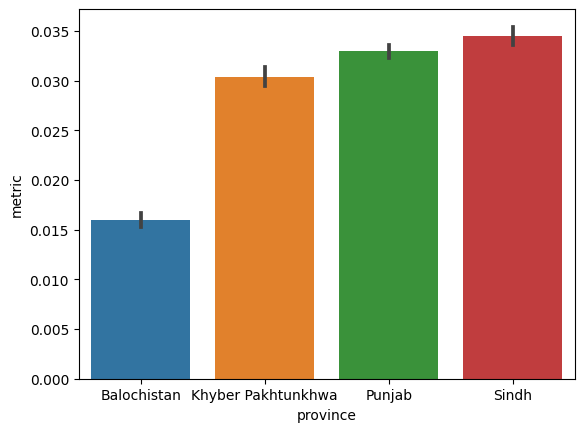

In [30]:
fig = sns.barplot(x = combined_data['province'], y = combined_data['metric'])

In [31]:
combined_data.query("province == 'Balochistan'")['metric'].mean()

0.015963999605783714

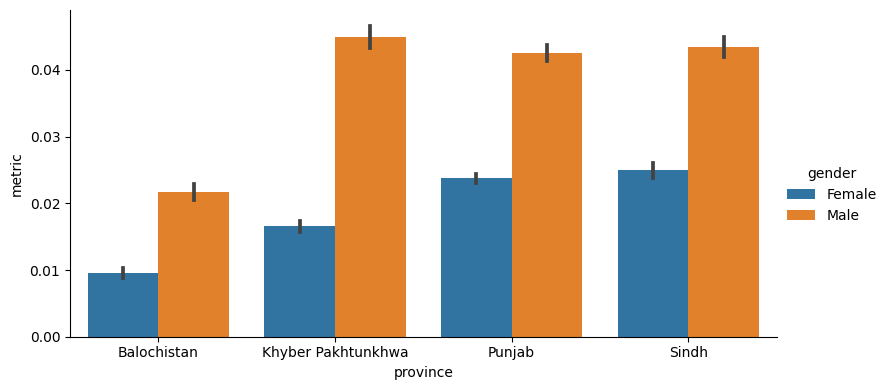

In [32]:
fig = sns.catplot(x = 'province', y = 'metric', hue = 'gender', data = combined_data, kind = 'bar', height = 4, aspect = 2)

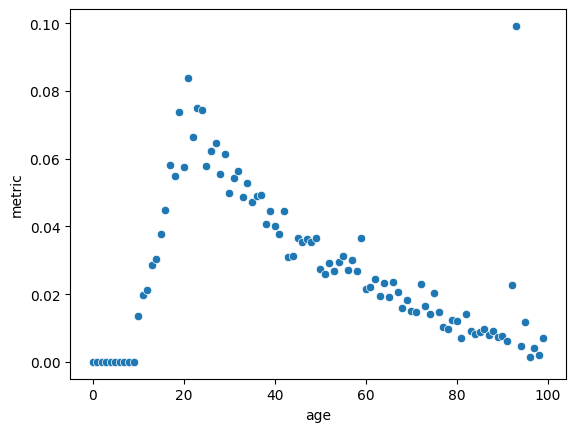

In [33]:
fig = sns.scatterplot(x = 'age', y = 'metric', data = combined_data[['age','metric']].groupby('age').mean())

In [34]:
combined_data[['age','metric']].groupby('age').mean().query('age < 93').idxmax()

metric    21.0
dtype: float64

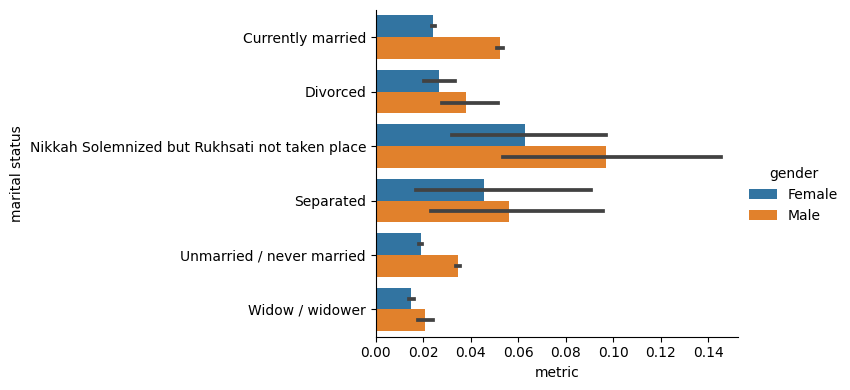

In [35]:
fig = sns.catplot(x = 'metric', y = 'marital status', hue = 'gender', data = combined_data, kind = 'bar', height = 4, aspect = 2, orient = 'h')

In [36]:
for col in combined_data.columns:
    print(col)

hhcode
province
region
psu
idc
s1aq02
s1aq03
gender
s1aq05
age
s1aq62
s1aq63
s1aq64
marital status
s1aq08
s1aq09
s1aq10
s1aq11
weights
s1bq01
s1bq02
s1bq03
s1bq04
s1bq05
s1bq06
s1bq07
s1bq08
s1bq09
s1bq10
s1bq11
s1bq12
s1bq13
s1bq14
s1bq15
s1bq16
s1bq17
s1bq18
s1bq19
s1bq20
s1bq21
s1bq22
s1bq23
s1bq24
s1bq25
s1bq26
s2aq01
s2aq02
s2aq03
s2aq04
s2bq01
s2bq02
s2bq03
s2bq04
s2bq05
s2bq06
s2bq07
s2bq08
s2bq09
s2bq10
s2bq11
s2bq12
s2bq13
s2bq14
s2bq15
s2bq16
s2bq17
s2bq18
s2bq19a
s2bq19b
s2bq19c
s2bq19d
s2bq19e
s2bq19f
s2bq19g
s2bq19h
s2bq19i
s2cq01
s2cq02
s2cq03_1
s2cq03_2
s2cq03_3
s2cq03_4
s2cq03_5
s2cq03_6
s2cq04
s2cq05
s2cq06
s2cq07
s2cq08
s2cq09_1
s2cq09_2
s2cq09_3
s2cq10
s2cq11
s2cq12_1
s2cq12_2
s2cq12_3
s2cq13_1
s2cq13_2
s2cq13_3
s2cq13_4
s2cq13_5
s2cq13_6
s2cq14_1
s2cq14_2
s2cq14_3
s3aq01
s3aq02
s3aq03
s3aq04
s3aq05
s3aq06
s3aq07
s3aq08
s3aq09
s3aq10
s3aq11
s3aq12
s3aq13
s3aq14
s3aq15
s3aq16
s3aq171
s3aq172
s3aq173
s3bq1a
s3bq1b
s3bq02
s3bq03
s3bq4a
s3bq4b
s3bq4c
s3bq4d
s3bq4e
s3bq4f

In [37]:
combined_data['s2bq14'] = combined_data['s2bq14'] 

In [38]:
combined_data = combined_data.rename(columns = {'s2bq14':'current grade adult',
                                 's2bq16':'education level',
                                 's2bq05':'highest grade child',
                                 's2bq08':'last year grade child'
                               })

In [39]:
combined_data['education level'] = combined_data['education level'].replace({
    'Play Group':0,
    'Nursery':0,
    'Prep':0,
    'Class1':1,
    'Class2':2,
    'Class3':3,
    'Class4':4,
    'Class5':5,
    'Class6':6,
    'Class7':7,
    'Class8':8,
    'Class9/ O-Level':9,
    'Class10/ O-Level':10,
    'Polytechnic diploma/Diploma':11,
    'FA/F.SC/ICOM/ICS/I.Com etc':12,
    'BA/B.SC/B.Com':13,
    'B.Ed/M.Ed':13,
    'B.A/B.SC/BS/BE':13,
    'MA/MSC':14,
    'Degree in medicine(MBBS/BDS/Pharm-D)':13,
    'Degree in agriculture':13,
    'Degree in law':13,
    'Degree in engineering':13,
    'Degree in Accountancy':13,
    'M.phill':14,
    'PHD':15,
    'MS':14,
    'other':7
})

In [40]:
combined_data = combined_data.sort_values(by = 'education level')

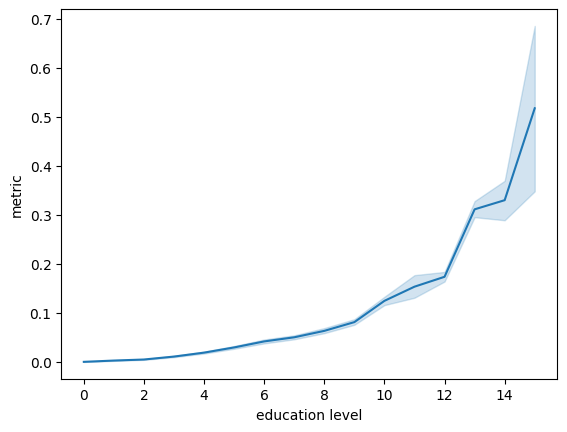

In [41]:
fig = sns.lineplot(x =combined_data['education level'].astype(float), y = combined_data['metric'])

In [42]:
import geopy as gpy

In [43]:
Coding = pd.read_excel('2018-2019\code.xls')
locator = gpy.Nominatim(user_agent="myGeocoder")
names = (Coding['District'] + ' Pakistan')       
c_df = pd.DataFrame({'x':np.zeros(len(Coding)),'y':np.zeros(len(Coding))})
for i in names.index:
    location = locator.geocode(names[i], timeout = None)
    if location == None:
        c_df.loc[i, 'x'] = None
        c_df.loc[i, 'y'] = None
    else:
        c_df.loc[i, 'x'] = location[-1][0]
        c_df.loc[i, 'y'] = location[-1][1]
Coding = pd.concat([Coding, c_df], axis = 1)

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=CHITRAL+DISTRICT+Pakistan&format=json&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001940C0D15E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
Coding.loc[6,'x'] = 34.5
Coding.loc[6,'y'] = 71.75
Coding.loc[9,'x'] = 34.770047
Coding.loc[9,'y'] = 73.134961
Coding.loc[12,'x'] = 34.539557
Coding.loc[12,'y'] = 72.875179
Coding.loc[20,'x'] = 33.522329
Coding.loc[20,'y'] = 71.061662
Coding.loc[21,'x'] = 33.110479
Coding.loc[21,'y'] = 71.091375
Coding.loc[25,'x'] = 32.943066
Coding.loc[25,'y'] = 69.955034
Coding.loc[50,'x'] = 30.813802
Coding.loc[50,'y'] = 73.453378
Coding.loc[52,'x'] = 30.638899
Coding.loc[52,'y'] = 73.119178
Coding.loc[57,'x'] = 30.818012
Coding.loc[57,'y'] = 70.489307
Coding.loc[58,'x'] = 29.10443
Coding.loc[58,'y'] = 70.330117
Coding.loc[59,'x'] = 30.969349
Coding.loc[59,'y'] = 70.942791
Coding.loc[66,'x'] = 28.271222
Coding.loc[66,'y'] = 69.383108
Coding.loc[68,'x'] = 27.5859189
Coding.loc[68,'y'] = 68.0060183
Coding.loc[71,'x'] = 28.027116
Coding.loc[71,'y'] = 69.323512
Coding.loc[77,'x'] = 25.031118
Coding.loc[77,'y'] = 68.477018
Coding.loc[78,'x'] = 25.751945
Coding.loc[78,'y'] = 68.477018
Coding.loc[82,'x'] = 25.732056
Coding.loc[82,'y'] = 70.25697
Coding.loc[84,'x'] = 25.473696
Coding.loc[84,'y'] = 69.955034
Coding.loc[87,'x'] = 25.10719
Coding.loc[87,'y'] = 67.237117
Coding.loc[88,'x'] = 24.873212
Coding.loc[88,'y'] = 67.106035
Coding.loc[91,'x'] = 26.298783
Coding.loc[91,'y'] = 68.238534
Coding.loc[93,'x'] = 26.805778
Coding.loc[93,'y'] = 68.047751
Coding.loc[96,'x'] = 30.805486
Coding.loc[96,'y'] = 66.712915
Coding.loc[101,'x'] = 30.847833
Coding.loc[101,'y'] = 69.955034
Coding.loc[102,'x'] = 31.014033
Coding.loc[102,'y'] = 68.333928
Coding.loc[104,'x'] = 31.7542
Coding.loc[104,'y'] = 69.7066
Coding.loc[115,'x'] = 28.487085
Coding.loc[115,'y'] = 68.643955
Coding.loc[127,'x'] = 36.279672
Coding.loc[127,'y'] = 73.276536
Coding.loc[131,'x'] = 36.279672
Coding.loc[131,'y'] = 73.276536
Coding.loc[133,'x'] = 35.4333316
Coding.loc[133,'y'] = 75.7333304
Coding.loc[140,'x'] = 33.706041
Coding.loc[140,'y'] = 73.724249

In [ ]:
combined_data['Pcode'] = combined_data['hhcode'].astype('string').str[:4].astype(int)

In [ ]:
combined_data['Latitude'] = np.zeros(len(combined_data))
combined_data['Longitude'] = np.zeros(len(combined_data))

In [ ]:
for index in Coding.index:
    code1 = Coding.loc[index, 'Pcode1']
    code2 = Coding.loc[index, 'Pcode2']
    t = combined_data.loc[(combined_data['Pcode'] == code1) | (combined_data['Pcode'] == code2)].index
    combined_data.loc[t, 'Latitude'] = Coding.loc[index, 'x']
    combined_data.loc[t, 'Longitude'] = Coding.loc[index, 'y']

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
hm = folium.Map(location=[30.3753, 69.3451], tiles='stamenterrain',zoom_start=5)
HeatMap(combined_data[['Latitude','Longitude','metric']], min_opacity=0.4, blur = 18).add_to(folium.FeatureGroup(name='Heat Map').add_to(hm))
folium.LayerControl().add_to(hm)
hm

In [ ]:
hm.save('pic.png')

In [52]:
combined_data = combined_data.rename(columns={'s1aq05':'resident status'})

In [54]:
df = combined_data[['province','region','age','gender','marital status','resident status','education level','metric']].copy()

In [55]:
df['province'] = df['province'].replace({
    'Khyber Pakhtunkhwa':0,
    'Punjab':1,
    'Sindh':2,
    'Balochistan':3
})

In [56]:
df['region'] = df['region'].replace({'Rural':0, 'Urban':1})

In [57]:
df['marital status'] = df['marital status'].replace({
    'Currently married':0,
    'Unmarried / never married':1,
    'Widow / widower':2,
    'Divorced':3,
    'Nikkah Solemnized but Rukhsati not taken place':4, 
    'Separated':5
}
)

In [58]:
df.gender = df.gender.replace({'Male':0, 'Female':1})

In [59]:
df['resident status'] = df['resident status'].replace({'Absent':0, 'Present':1})

In [60]:
df = df.astype(float)

<AxesSubplot:>

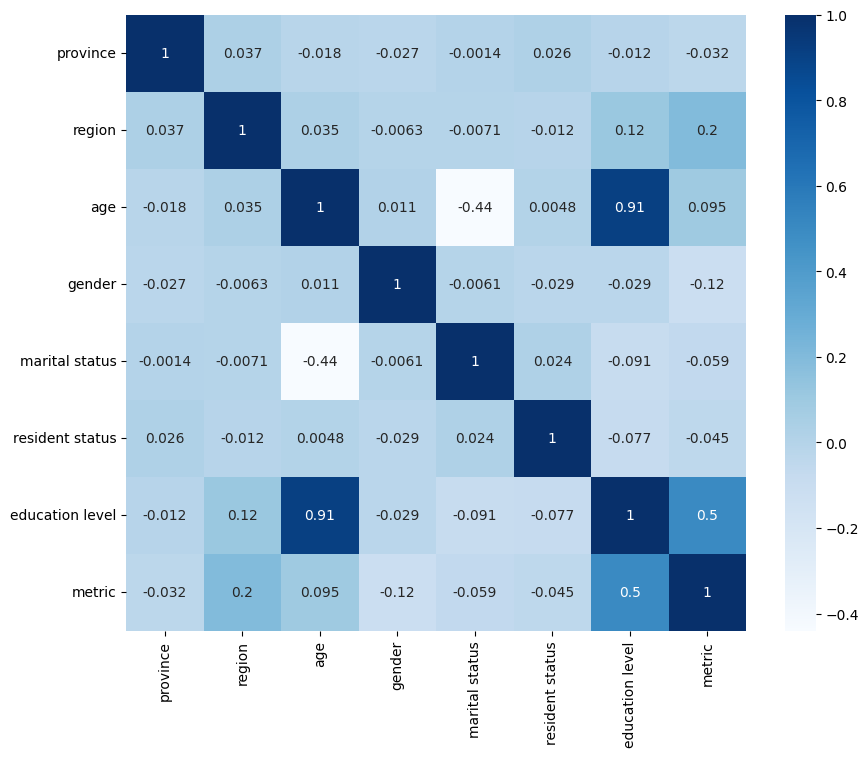

In [61]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, ax = ax)